# Social Media Usage Prediction

# Import Libraries 

In [35]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error  , r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Load Dataset & VIsualize 

In [36]:
df = pd.read_csv("Smartphone_usage.csv")

In [37]:
print(df.head())


  User_ID  Age  Gender      Occupation Device_Type  Daily_Phone_Hours  \
0      U1   58    Male    Professional     Android                1.3   
1      U2   25    Male    Professional     Android                1.2   
2      U3   19    Male         Student         iOS                5.3   
3      U4   35  Female  Business Owner         iOS                5.8   
4      U5   33    Male      Freelancer     Android                7.9   

   Social_Media_Hours  Work_Productivity_Score  Sleep_Hours  Stress_Level  \
0                 6.7                        6          8.8             4   
1                 1.5                        5          6.4             1   
2                 5.7                        5          9.0             4   
3                 2.5                        2          5.7             3   
4                 1.3                        4          5.7             3   

   App_Usage_Count  Caffeine_Intake_Cups  Weekend_Screen_Time_Hours  
0               42          

In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    50000 non-null  object 
 1   Age                        50000 non-null  int64  
 2   Gender                     50000 non-null  object 
 3   Occupation                 50000 non-null  object 
 4   Device_Type                50000 non-null  object 
 5   Daily_Phone_Hours          50000 non-null  float64
 6   Social_Media_Hours         50000 non-null  float64
 7   Work_Productivity_Score    50000 non-null  int64  
 8   Sleep_Hours                50000 non-null  float64
 9   Stress_Level               50000 non-null  int64  
 10  App_Usage_Count            50000 non-null  int64  
 11  Caffeine_Intake_Cups       50000 non-null  int64  
 12  Weekend_Screen_Time_Hours  50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usag

In [39]:
df.describe()

,Age,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,39.034960,6.509116,4.267250,5.503760,6.497744,5.504500,32.43898,3.004580,8.006844
std,12.414877,3.170903,2.164743,2.874806,1.449551,2.871095,16.12151,1.996657,3.461300
min,18.000000,1.000000,0.500000,1.000000,4.000000,1.000000,5.00000,0.000000,2.000000
25%,28.000000,3.800000,2.400000,3.000000,5.200000,3.000000,18.00000,1.000000,5.000000
50%,39.000000,6.500000,4.300000,5.500000,6.500000,6.000000,32.00000,3.000000,8.000000
75%,50.000000,9.200000,6.100000,8.000000,7.800000,8.000000,46.00000,5.000000,11.000000
max,60.000000,12.000000,8.000000,10.000000,9.000000,10.000000,60.00000,6.000000,14.000000


# Data understanding and cleaning

In [40]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Device_Type                  0
Daily_Phone_Hours            0
Social_Media_Hours           0
Work_Productivity_Score      0
Sleep_Hours                  0
Stress_Level                 0
App_Usage_Count              0
Caffeine_Intake_Cups         0
Weekend_Screen_Time_Hours    0
dtype: int64

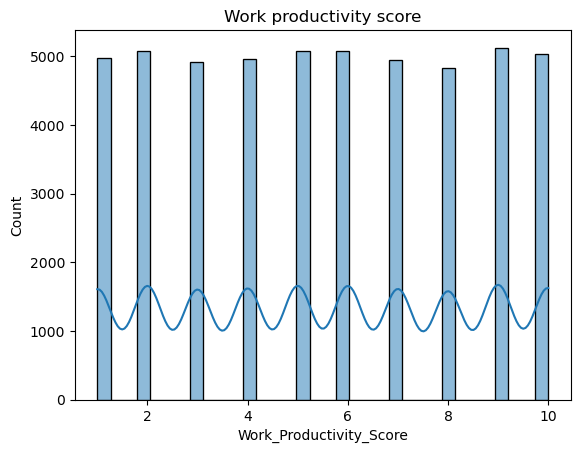

In [41]:
sns.histplot(df["Work_Productivity_Score"],kde = True)
plt.title("Work productivity score")
plt.show()

# Feature Engineering : creating new features

In [42]:
df["Total_Screen_Time"] = df["Daily_Phone_Hours"] + df["Weekend_Screen_Time_Hours"]
df["Social_Media_Ratio"] = df["Social_Media_Hours"] / (df["Daily_Phone_Hours"] + 0.1)
df["Caffeine_Stress_Index"] = df["Caffeine_Intake_Cups"] * df["Stress_Level"]

In [43]:
df.drop("User_ID" , axis = 1 , inplace = True)

In [44]:
x = df.drop("Work_Productivity_Score" , axis = 1)
y = df["Work_Productivity_Score"]

# Preprocessing Pipeline 

In [45]:
cat_val = ["Gender" , "Occupation" , "Device_Type"]
Num_val = x.select_dtypes(include = np.number).columns.tolist()

preprocessor = ColumnTransformer(transformers = [("num" , StandardScaler() , Num_val),
                                                ("cat" , OneHotEncoder(drop = "first"), cat_val)])

In [46]:
x_train , x_test , y_train , y_test = train_test_split( x,y, test_size = 0.2 , random_state = 42 )

# ML Model : Linear Regression 

In [47]:
base_model = Pipeline(steps = [("preprocessing" , preprocessor),
                                ("model" , LinearRegression())])

base_model.fit(x_train , y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Daily_Phone_Hours',
                                                   'Social_Media_Hours',
                                                   'Sleep_Hours',
                                                   'Stress_Level',
                                                   'App_Usage_Count',
                                                   'Caffeine_Intake_Cups',
                                                   'Weekend_Screen_Time_Hours',
                                                   'Total_Screen_Time',
                                                   'Social_Media_Ratio',
                                                   'Caffeine_Stress_Index']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Occupation',
                                                   'Device_Type'])])),
                ('model', LinearRegression())])

In [48]:
LenReg_y_pred = base_model.predict(x_test)

print("Linear Regression RMSE : " , np.sqrt(mean_squared_error(y_test , LenReg_y_pred)))

print("Linear Regression R^2 : " , r2_score(y_test , LenReg_y_pred))

Linear Regression RMSE :  2.882668463804291
Linear Regression R^2 :  -0.0005308026931765131


# Ensemble Model : Random Forest

In [55]:
Ran_For_model = Pipeline(steps = [("preprocessing" , preprocessor) , 
                                 ("model" , RandomForestRegressor(n_estimators = 200 , max_depth = 10 , random_state = 42))])

Ran_For_model.fit(x_train , y_train)

RanFor_y_pred = Ran_For_model.predict(x_test)

print("Random Forest RMSE : " , np.sqrt(mean_squared_error(y_test ,RanFor_y_pred )))

print("Random Forest R^2 : " , r2_score(y_test ,RanFor_y_pred ))

Random Forest RMSE :  2.8866931370250803
Random Forest R^2 :  -0.003326559901283721


# Cross - Validation 

In [57]:
RF_CV_RMSE = np.sqrt(-cross_val_score(Ran_For_model , x_train , y_train , cv = 5 , scoring = "neg_mean_squared_error").mean())

print("Random Forest Cross Validation RMSE : " , RF_CV_RMSE)

Random Forest Cross Validation RMSE :  2.8772122053548315


# Plotting  : Predicted vs Actual plot

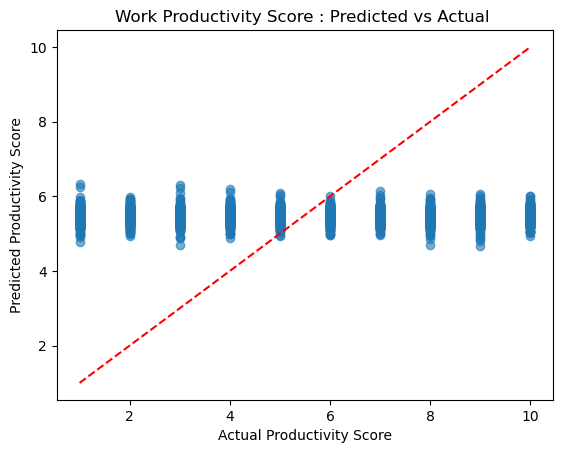

In [59]:
plt.scatter(y_test , RanFor_y_pred , alpha = 0.6)
plt.plot([y.min(), y.max()],[y.min(), y.max()] , 'r--')
plt.xlabel("Actual Productivity Score")
plt.ylabel("Predicted Productivity Score")
plt.title("Work Productivity Score : Predicted vs Actual ")
plt.show()